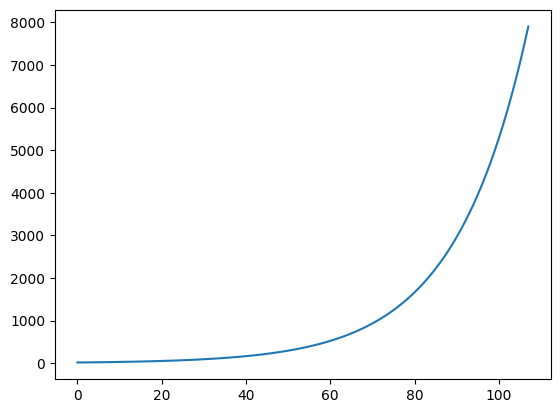

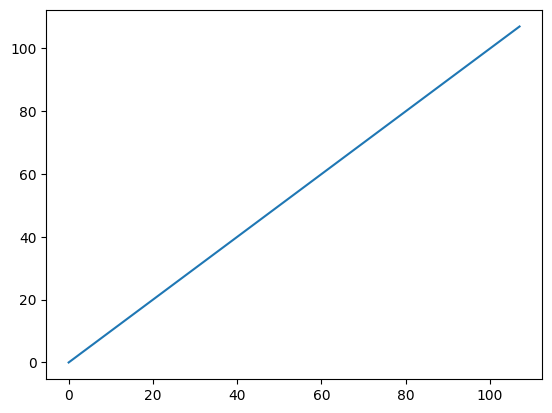

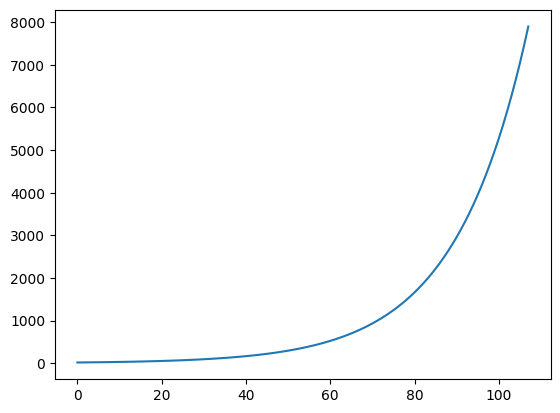

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

baseNotes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]


# making list of all notes ... C1, C#1 ... A8, A#8, B8
allNotes = []

for num in range(9):
    for note in baseNotes:
        allNotes.append(note + str(num))
        

#table of frequencies of notes        
frequencies = [16.35, 17.32, 18.35, 19.45, 20.60, 21.83, 23.12, 24.50, 25.96, 27.50, 29.14, 30.87, 
               32.70, 34.65, 36.71, 38.89, 41.20, 43.65, 46.25, 49.00, 51.91, 55.00, 58.27, 61.74,
               65.41, 69.30, 73.42, 77.78, 82.41, 87.31, 92.50, 98.00, 103.83, 110.00, 116.54, 123.47,
               130.81, 138.59, 146.83, 155.56, 164.81, 174.61, 185.00, 196.00, 207.65, 220.00, 233.08, 246.94,
               261.63, 277.18, 293.66, 311.13, 329.63, 349.23, 369.99, 392.00, 415.30, 440.00, 466.16, 493.88,
               523.25, 554.37, 587.33, 622.2, 659.25, 698.46, 739.99, 783.99, 830.61, 880.00, 932.33, 987.77,
               1046.50, 1108.73, 1174.66, 1244.51, 1318.51, 1396.91, 1479.98, 1567.98, 1661.22, 1760.00, 1864.66, 1975.53,
               2093.00, 2217.46, 2349.32, 2489.02, 2637.02, 2793.83, 2959.96, 3135.96, 3322.44, 3520.00, 3729.31, 3951.07,
               4186.01, 4434.92, 4698.63, 4978.03, 5274.04, 5587.65, 5919.91, 6271.93, 6644.88, 7040.00, 7458.62, 7902.13]



# finding note frequencies progression
x = np.arange(0.0,len(frequencies), 1)
plt.figure(1)
plt.plot(range(len(frequencies)), frequencies)
plt.figure(2)
plt.plot(range(len(frequencies)), np.log2(np.array(frequencies) / 16.35) * 12)


def perfectNoteFreqs(index):
    return 16.35 * 2 ** (index / 12)

plt.figure(3)
plt.plot(range(len(frequencies)), perfectNoteFreqs(x))







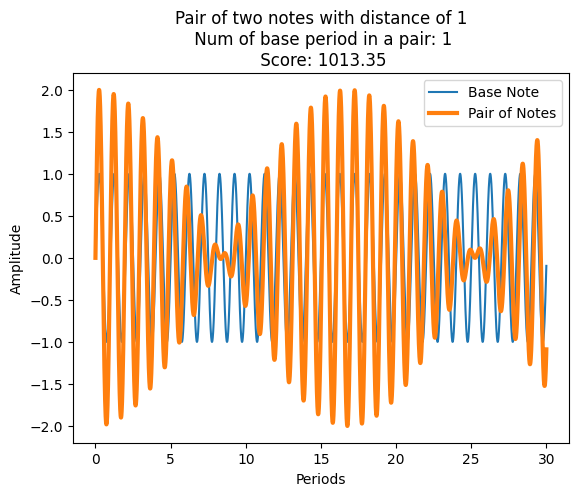

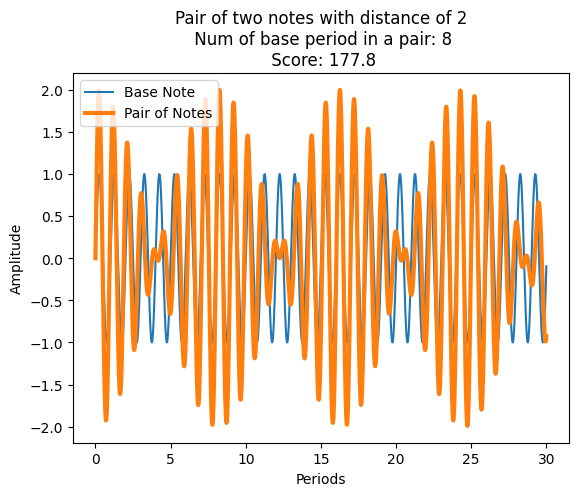

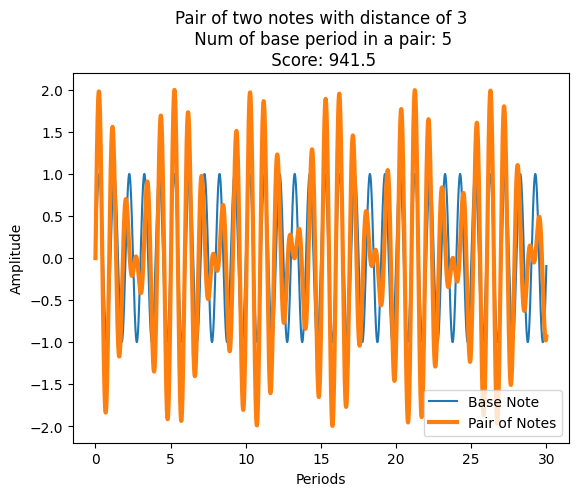

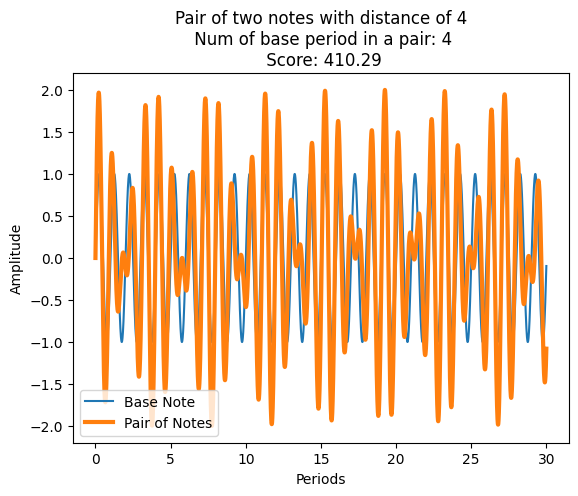

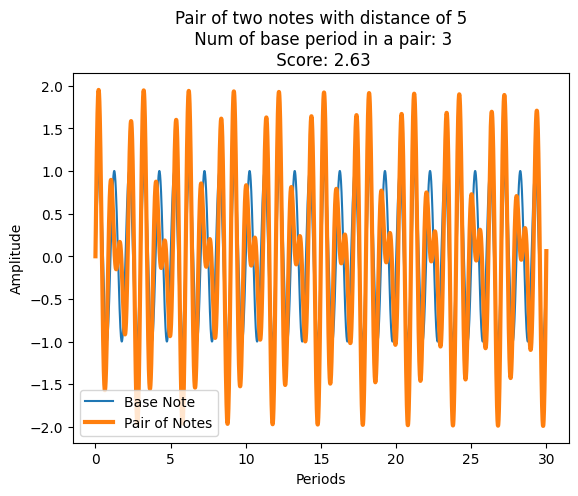

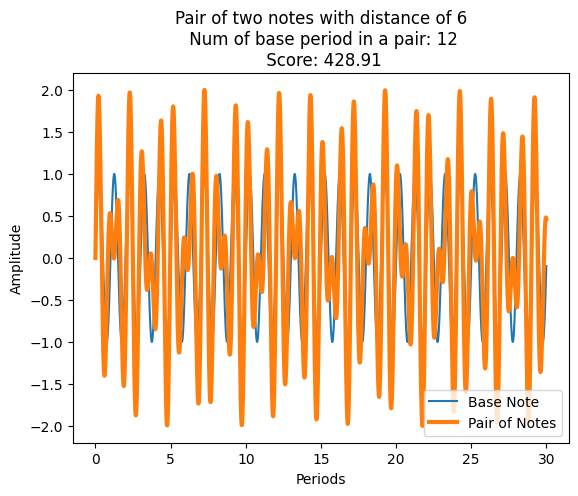

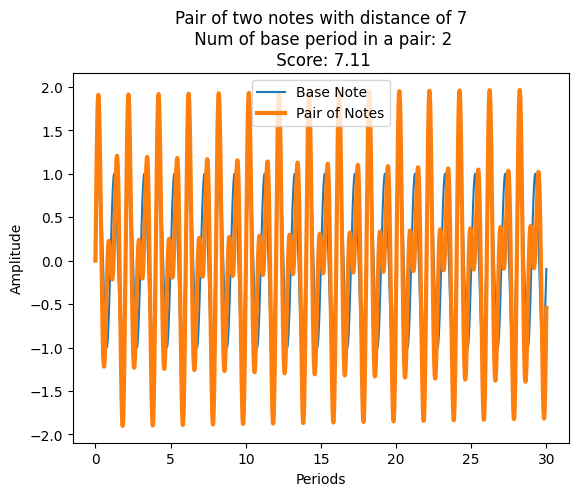

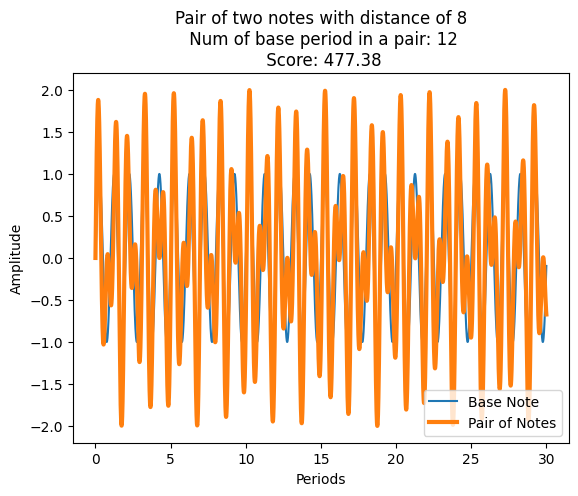

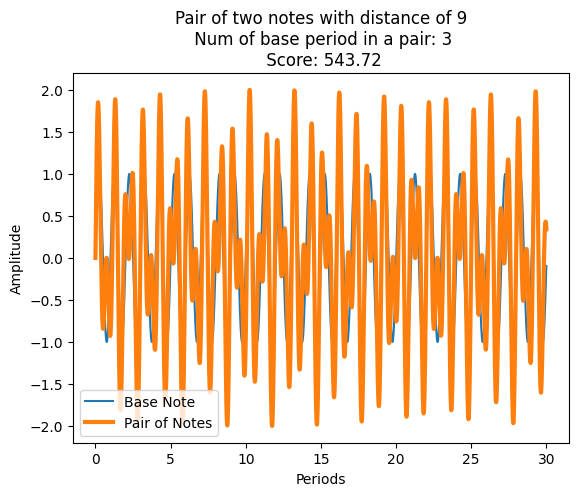

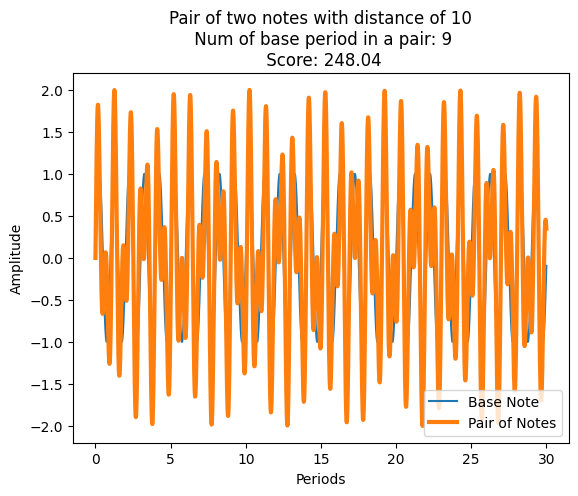

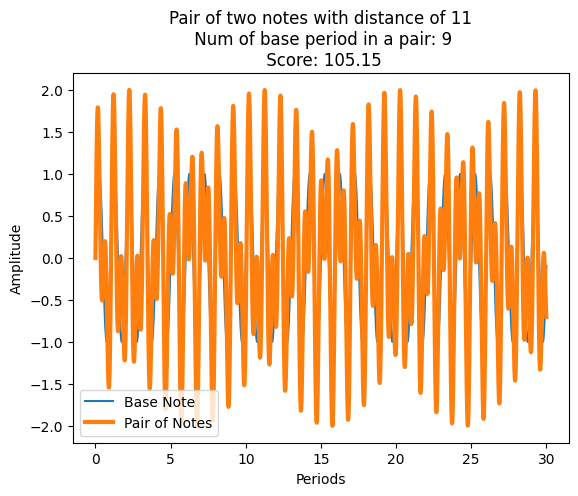

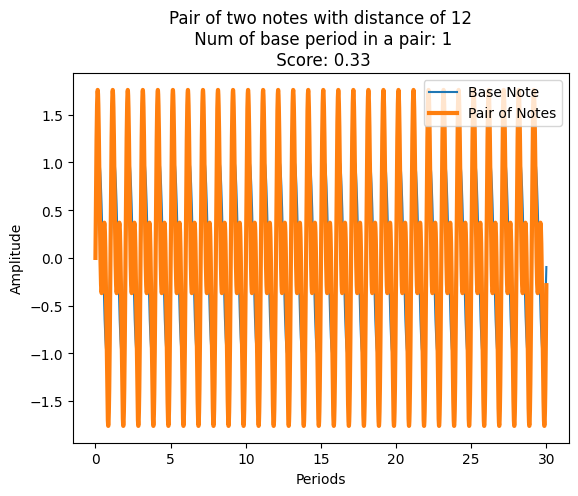

In [8]:
# looking note pairs

PI = 3.14

def makeNoteSineWave(freq, time):
    return np.sin(2 * PI * freq * time)

def makeNoteSineWaveFromIndex(index, time):
    return makeNoteSineWave(perfectNoteFreqs(index), time)

def makePairOfNoteSineWaveFromIndex(index, time, offset):
    return makeNoteSineWaveFromIndex(index, time) + makeNoteSineWaveFromIndex(index + offset, time)

def findNonPerfectDiscretePeriod(arr, baseDiscretePeriod):
    period = len(arr)
    window = period // 2
    orgArr = arr[0:window]
    res = 2**30
    discretePeriod = len(arr)
    treshold = 0.01
    for i in range(baseDiscretePeriod, window, baseDiscretePeriod):
        shiftedArr = arr[i : i + window]
        squareSum = np.sum(np.square(orgArr - shiftedArr))
        
        if(squareSum < res):
            res = squareSum
            discretePeriod = i
            if(squareSum < treshold):
                break
    return [discretePeriod // baseDiscretePeriod, res]
    
testIndex = 48
baseFreq = perfectNoteFreqs(testIndex);
baseT = 1 / baseFreq;
numOfBasePeriods = 30
numOfDots = 30000
baseDiscretePeriod = numOfDots // numOfBasePeriods;
t = np.linspace(0, baseT * numOfBasePeriods,  numOfDots)

baseSine = makeNoteSineWaveFromIndex(testIndex, t)

for i in range(1, 13):
    
    pairNoteArr = makePairOfNoteSineWaveFromIndex(testIndex, t, i)
    
    discretePeriod = findNonPerfectDiscretePeriod(pairNoteArr, baseDiscretePeriod)
    plt.figure(i)
    plt.title("Pair of two notes with distance of " + str(i) +
              "\n Num of base period in a pair: " + str(int(discretePeriod[0])) + 
              "\n Score: " + str(round(discretePeriod[1], 2))) 
    plt.xlabel("Periods")
    plt.ylabel("Amplitude")
    plt.plot(t / baseT, baseSine)
    plt.plot(t / baseT, makePairOfNoteSineWaveFromIndex(testIndex, t, i), linewidth=3)
    plt.legend(["Base Note", "Pair of Notes"])
    







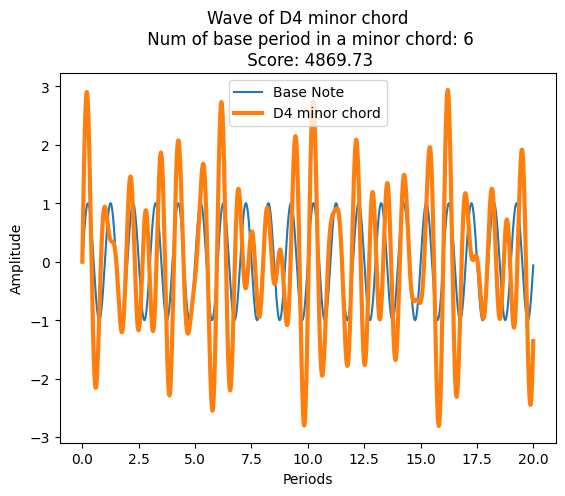

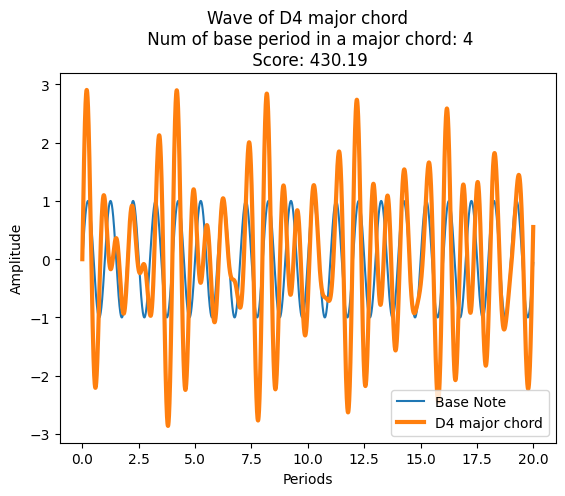

In [9]:
# making major and minor chords
# list of note freqs
minors = []
majors = []


for i in range(len(frequencies) - 8): 
    minors.append([frequencies[i], frequencies[i + 3], frequencies[i + 7]])
    majors.append([frequencies[i], frequencies[i + 4], frequencies[i + 7]])



def makeMinorWave(index, t):
    return np.sin(2*PI*t*minors[index][0]) + np.sin(2*PI*t*minors[index][1]) + np.sin(2*PI*t*minors[index][2]) 

def makeMajorWave(index, t):
    return np.sin(2*PI*t*majors[index][0]) + np.sin(2*PI*t*majors[index][1]) + np.sin(2*PI*t*majors[index][2]) 

def makeMinorWavePerfect(index, t):
    return np.sin(2*PI*t*perfectNoteFreqs(index)) + np.sin(2*PI*t*perfectNoteFreqs(index + 3)) + np.sin(2*PI*t*perfectNoteFreqs(index + 7)) 

def makeMajorWavePerfect(index, t):
    return np.sin(2*PI*t*perfectNoteFreqs(index))  + np.sin(2*PI*t*perfectNoteFreqs(index + 4)) + np.sin(2*PI*t*perfectNoteFreqs(index + 7)) 

PI = 3.14


testIndex = 50
baseFreq = perfectNoteFreqs(testIndex);
baseT = 1 / baseFreq;
numOfBasePeriods = 20
numOfDots = 30000
baseDiscretePeriod = numOfDots // numOfBasePeriods;
t = np.linspace(0, baseT * numOfBasePeriods,  numOfDots)

baseSine = makeNoteSineWaveFromIndex(testIndex, t)

minorNoteArr = makeMinorWavePerfect(testIndex, t)
majorNoteArr = makeMajorWavePerfect(testIndex, t)

discretePeriodMinor = findNonPerfectDiscretePeriod(minorNoteArr, baseDiscretePeriod)
plt.figure(1)
plt.title("Wave of " + allNotes[testIndex] + " minor chord" 
          "\n Num of base period in a minor chord: " + str(int(discretePeriodMinor[0])) + 
          "\n Score: " + str(round(discretePeriodMinor[1], 2))) 
plt.xlabel("Periods")
plt.ylabel("Amplitude")
plt.plot(t / baseT, baseSine)
plt.plot(t / baseT, minorNoteArr, linewidth=3)
plt.legend(["Base Note", allNotes[testIndex] + " minor chord"])

discretePeriodMajor = findNonPerfectDiscretePeriod(majorNoteArr, baseDiscretePeriod)
plt.figure(2)
plt.title("Wave of " + allNotes[testIndex] + " major chord" 
          "\n Num of base period in a major chord: " + str(int(discretePeriodMajor[0])) + 
          "\n Score: " + str(round(discretePeriodMajor[1], 2))) 
plt.xlabel("Periods")
plt.ylabel("Amplitude")
plt.plot(t / baseT, baseSine)
plt.plot(t / baseT, majorNoteArr, linewidth=3)
plt.legend(["Base Note", allNotes[testIndex] + " major chord"])

